# Getting data for our NN
we will be scraping our data from carwale.com's used car listings, then we will refine and clean it for our Neural network training.

### after analysing html page of carwale's listings
we can see that they embed listing data right into script tag as json. and each page have around 30 listings only.  
so there are two main ways to get more data,   
1. Scraping multiple pages of each city.  
2. Scraping 30 examples from around 500 cities.  

so i think scraping from different cities will be a better idea for the following resons:  
1. It seems to be possible way simpler than pagenating.
2. having data from a long list of cities will give us richer data. i.e., more diversity.

so now let's get a list of about 500 indian cities (one word names).
then i will be iterating over each city's page one by one.

In [4]:
from bs4 import BeautifulSoup
import requests, certifi
import json
import pandas

CARDATA = []

indian_cities_500 = ['palghar', 'aligarh', 'siwan', 'jammu', 'junagadh', 'shajapur', 'angul', 'kendrapara', 'vizianagaram', 'ahmedabad', 'darbhanga', 'vidisha', 'bengaluru', 'azamgarh', 'kutch', 'koppal', 'pali', 'lucknow', 'amravati', 'madanapalle', 'latur', 'bahraich', 'bharuch', 'palgharmumbai', 'morbi', 'muzaffarnagar', 'manendragarh', 'patna', 'fatehpur', 'satna', 'churu', 'parbhani', 'bijnor', 'subarnapur', 'farrukhabad', 'bargarh', 'satara', 'banaskantha', 'kannauj', 'dhenkanal', 'devbhoomiDwarka', 'jalna', 'ongole', 'tiruppur', 'khammam', 'tonk', 'kollam', 'nanded', 'karimnagar', 'neemuch', 'basti', 'chhapra', 'ramanagara', 'jalgaon', 'jabalpur', 'telangana', 'shivpuri', 'chittorgarh', 'raisen', 'badaun', 'sagar', 'hapur', 'mysore', 'dakshinakannada', 'madurai', 'visakhapatnam', 'adilabad', 'chandauli', 'udupi', 'ankleshwar', 'kolkata', 'lakhimpur', 'katni', 'dongargarh', 'barmer', 'chennai', 'raigad', 'surat', 'hingoli', 'khurda', 'betul', 'mandsaur', 'bastar', 'narsinghpur', 'tirunelveli', 'aurangabad', 'bulandshahr', 'allahabad', 'wardha', 'mahoba', 'davangere', 'etawah', 'malegaon', 'mandya', 'nandurbar', 'buldhana', 'chandigarh', 'jalore', 'nalgonda', 'gonda', 'amritsar', 'solapur', 'warangal', 'coimbatore', 'barabanki', 'ambikapur', 'jamui', 'ghazipur', 'jhunjhunu', 'yavatmal', 'kanpurdehat', 'rajahmundry', 'chikkaballapur', 'hazaribagh', 'amethi', 'silvassa', 'kawardha', 'kodagu', 'bikaner', 'chamarajanagar', 'korba', 'giridih', 'chittoor', 'chhatarpur', 'gaya', 'karwar', 'kushinagar', 'gadag', 'sirohi', 'mathura', 'shravasti', 'karaikal', 'mysuru', 'bhilai', 'pakur', 'haveri', 'navsari', 'osmanabad', 'purnia', 'jodhpur', 'kasganj', 'daltonganj', 'tikamgarh', 'gorakhpur', 'rampur', 'sitapur', 'dewas', 'cuttack', 'rohtak', 'baripada', 'sambalpur', 'dhar', 'bokaro', 'rourkela', 'bhiwandi', 'koraput', 'mahasamund', 'gadchiroli', 'sangli', 'gurgaon', 'pratapgarh', 'faridabad', 'mumbai', 'nagaur', 'burhanpur', 'ratlam', 'uttarakannada', 'nellimarla', 'meerut', 'rewa', 'botad', 'saharanpur', 'hoshangabad', 'damoh', 'deoria', 'kochi', 'sehore', 'bhilwara', 'gwalior', 'kurnool', 'kolhapur', 'gandhinagar', 'dehradun', 'porbandar', 'ludhiana', 'rajsamand', 'sonbhadra', 'panipat', 'chikmagalur', 'agar', 'akola', 'asansol', 'machilipatnam', 'belagavi', 'belgaum', 'udaipur', 'simdega', 'dhanbad', 'westgodavari', 'kadapa', 'puri', 'ashoknagar', 'bangalore', 'durgapur', 'jeypore', 'ramgarh', 'tumkur', 'rangareddy', 'bundi', 'shimoga', 'sasaram', 'mahe', 'mau', 'dumka', 'jaisalmer', 'maharajganj', 'champa', 'budaun', 'siddharthnagar', 'bharatpur', 'ajmer', 'vijayawada', 'nellore', 'delhi', 'girSomnath', 'chhindwara', 'baloda', 'salem', 'bhiwani', 'yanam', 'begusarai', 'nabrangpur', 'jhansi', 'puducherry', 'banda', 'munger', 'nashik', 'nuapada', 'auraiya', 'dhule', 'arrah', 'rajmahal', 'ahmednagar', 'shivamogga', 'moradabad', 'panna', 'surajpur', 'eastgodavari', 'jagdalpur', 'katihar', 'pithampur', 'mainpuri', 'nalanda', 'rayagada', 'agra', 'medininagar', 'bhubaneswar', 'ballia', 'kanpur', 'jamnagar', 'balod', 'mandla', 'pune', 'seoni', 'raipur', 'krishna', 'koderma', 'jalaun', 'umaria', 'ranchi', 'raichur', 'karauli', 'varanasi', 'chirmiri', 'alirajpur', 'amreli', 'baghpat', 'nizamabad', 'noida', 'datia', 'khargone', 'balasore', 'mehsana', 'bokarosteelcity', 'sikar', 'prakasam', 'hardoi', 'kolar', 'latehar', 'khandwa', 'raebareli', 'pilibhit', 'srikakulam', 'guwahati', 'sindhudurg', 'sabarkantha', 'dindori', 'mirzapur', 'panchmahal', 'medak', 'jaipur', 'sultanpur', 'balrampur', 'mahabubnagar', 'rajgarh', 'ratnagiri', 'diu', 'unnao', 'chitrakoot', 'thane', 'kota', 'buxar', 'jamalpur', 'jhabua', 'lohardaga', 'hubli', 'guntur', 'jajpur', 'beed', 'chapra', 'deoghar', 'eluru', 'hosur', 'palasa', 'firozabad', 'ambala', 'gulbarga', 'bhavnagar', 'raigarh', 'chitradurga', 'ayodhya', 'dholpur', 'barwani', 'jalandhar', 'nayagarh', 'howrah', 'jaunpur', 'godda', 'nellai', 'gopalpur', 'bareilly', 'bilaspur', 'rajkot', 'maheshtala', 'gondia', 'valsad', 'surendranagar', 'durg', 'sidhi', 'etah', 'singrauli', 'bhopal', 'ghaziabad', 'kanpurnagar', 'baleshwar', 'vadodara', 'kakinada', 'chandrapur', 'srinagar', 'indore', 'shahjahanpur', 'bijapur', 'alwar', 'anuppur', 'nagpur', 'tirupati', 'davanagere', 'bhagalpur', 'lalitpur', 'washim', 'muzaffarpur', 'ujjain', 'sawaiMadhopur', 'samastipur', 'siliguri', 'hamirpur', 'naviMumbai', 'bhind', 'bhandara', 'bellary', 'chaibasa', 'hassan', 'motihari', 'keonjhar', 'suryapet', 'morena', 'bagalkot', 'anantapur', 'hyderabad', 'guna', 'shamli', 'daman', 'tiruchirappalli', 'bettiah']


browser = {
    "User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64)"
}

for city in (indian_cities_500):
    try:
        req = requests.get('https://www.carwale.com/used/' + city + '/', stream=True, headers=browser, verify=certifi.where()).text

        soup = BeautifulSoup(req)
        for i in range(3):
            try:
                jsonList = soup.head.find_all('script')[i].text

                carDict = json.loads(jsonList)

                # print(jsonList)

                listCar = carDict['@graph'][0]['itemListElement']
                for car in listCar:
                    title = car["name"]
                    model = car["model"]
                    vehicleDate = car["vehicleModelDate"]
                    price = car["offers"]["price"]
                    brand = car["Brand"]["name"]
                    kmDriven = car["mileageFromOdometer"]["value"]
                    fuelType = car["fuelType"]
                    bodyType = car["bodyType"]
                    seatCap = car["seatingCapacity"]
                    prevOwns = car["numberOfPreviousOwners"]
                    transmission = car["vehicleTransmission"]

                    CARDATA.append([title, model, vehicleDate, price, brand, kmDriven, fuelType, bodyType, seatCap, prevOwns, transmission])

                print(city + " done!")
                break
            except:
                if i==2:
                    print(city + " failed!")
                    break
                else:
                    pass
        
    except:
        print(city + " failed!")


tableCar = pandas.DataFrame(CARDATA, columns=['Name','Model','Date of assembly', 'Price', 'Brand', 'KM Driven', 'Fuel Type', 'Body Type', 'Seat capicity', 'No. of prev owners', 'Transmission'])

print(CARDATA[0], "and", len(CARDATA) - 1, "more")


palghar done!
aligarh done!
siwan done!
jammu done!
junagadh done!
shajapur done!
angul done!
kendrapara done!
vizianagaram done!
ahmedabad done!
darbhanga done!
vidisha done!
bengaluru done!
azamgarh done!
kutch done!
koppal done!
pali done!
lucknow done!
amravati done!
madanapalle done!
latur done!
bahraich done!
bharuch done!
palgharmumbai failed!
morbi done!
muzaffarnagar done!
manendragarh done!
patna done!
fatehpur done!
satna done!
churu done!
parbhani done!
bijnor done!
subarnapur failed!
farrukhabad done!
bargarh done!
satara done!
banaskantha done!
kannauj done!
dhenkanal done!
devbhoomiDwarka failed!
jalna done!
ongole done!
tiruppur done!
khammam done!
tonk done!
kollam done!
nanded done!
karimnagar done!
neemuch done!
basti done!
chhapra done!
ramanagara done!
jalgaon done!
jabalpur done!
telangana failed!
shivpuri done!
chittorgarh done!
raisen done!
badaun done!
sagar done!
hapur done!
mysore done!
dakshinakannada failed!
madurai done!
visakhapatnam done!
adilabad done!


so now the scraping is complete and we have got around 8700 examples in a csv file, but all these examples aren't ready to be used as training data.  
we would need to first remove duplicate examples

In [5]:
uniqueTableCar = tableCar.drop_duplicates()
uniqueTableCar.to_csv('UniqueCars.csv', index=False)

so now we are left with 5145 examples only, these are all unique real life listings.  
we will now turn this data into a numpy array to actually use it as a training data.

In [ ]:
import numpy as np
import pandas
import matplotlib.pyplot as plt


dff = pandas.read_csv('UniqueCars.csv')
brands = []
brandsF = np.ones(37)
fuelTypes = []
fuelTypesF = np.ones(9)
bodyTypes = []
bodyTypesF = np.ones(14)
ownerTypes = []
ownerTypesF = np.ones(7)
transmissionTypes = []
transmissionTypesF = np.ones(8)
cities = []
citiesF = np.ones(347)

for index, carr in dff.iterrows():
    if carr['No. of prev owners'] == '4 or More Owners':
        carr['No. of prev owners'] = "More Than 4 Owners"
    if carr['Brand'] not in brands:
        brands.append(carr['Brand'])
    else:
        brandsF[brands.index(carr['Brand'])] += 1
    if carr['Fuel Type'] not in fuelTypes:
        fuelTypes.append(carr['Fuel Type'])
    else:
        fuelTypesF[fuelTypes.index(carr['Fuel Type'])] += 1
    if carr['Body Type'] not in bodyTypes:
        bodyTypes.append(carr['Body Type'])
    else:
        bodyTypesF[bodyTypes.index(carr['Body Type'])] += 1
    if carr['No. of prev owners'].strip() not in ownerTypes:
        ownerTypes.append(carr['No. of prev owners'].strip())
    else:
        ownerTypesF[ownerTypes.index(carr['No. of prev owners'].strip())] += 1
    if carr['Transmission'] not in transmissionTypes:
        transmissionTypes.append(carr['Transmission'])
    else:
        transmissionTypesF[transmissionTypes.index(carr['Transmission'])] += 1

# all these arrangements are ascending order, i.e., first type is least while last one is most expensive, so our model will pick some +ve weights for them
brands_sorted_by_price = [
    "Datsun", "Force Motors", "Mahindra-Renault", "Ssangyong", "Fiat", "Chevrolet",
    "Tata", "Maruti Suzuki", "Mahindra", "Hyundai", "Renault", "Honda", "Nissan", "Ford",
    "Kia", "MG", "Skoda", "Volkswagen", "Citroen", "Isuzu", "BYD",
    "Toyota", "Mitsubishi", "MINI", "Jeep",
    "Volvo", "Lexus", "Jaguar", "Land Rover",
    "Audi", "BMW", "Mercedes-Benz",
    "Porsche", "Bentley", "Rolls-Royce", "Lamborghini", "Hummer"
]
fuels_sorted_by_price = [
    "LPG",  
    "CNG",  
    "Petrol",  
    "Diesel",  
    "Electric",  
    "Hybrid",  
    "Mild Hybrid (Electric + Diesel)",  
    "Mild Hybrid(Electric + Petrol)",  
    "Plug-in Hybrid (Electric + Petrol)"
]
bodytype_sorted_by_price = [
    "Hatchback",  
    "CompactSedan",  
    "SubCompactSuv",  
    "CompactSuv",  
    "Sedan",  
    "MPV_MUV",  
    "Minivan",  
    "SUV",  
    "StationWagon",  
    "Truck",  
    "FullSizeSuv",  
    "Coupe",  
    "Convertible",  
    "15"   # unclear category, but if it means 15-seater / tempo traveller → very expensive
]
transmission_sorted_by_price = [
    "Manual",  
    "Clutchless Manual (IMT)",  
    "Automatic (AMT)",  
    "Automatic (CVT)",  
    "Automatic (TC)",  
    "Automatic (e-CVT)",  
    "Automatic (DCT)",  
    "Automatic"
]
ownerSorted = [
    'First Owner',
    'Second Owner', 
    'Third Owner', 
    'Fourth Owner', 
    '4 or More Owners',
    'More Than 4 Owners',
    'UnRegistered Car'
]
print(len(brands_sorted_by_price), len(fuels_sorted_by_price), len(bodytype_sorted_by_price), len(transmission_sorted_by_price))

DATACAR = np.zeros((len(dff), 9))

for indexx, cars in dff.iterrows():
    # DATACAR[indexx]
    DATACAR[indexx, 0] = 2025 - cars['Date of assembly'] #age
    DATACAR[indexx, 1] = brands_sorted_by_price.index(cars['Brand']) + 1 #brand
    DATACAR[indexx, 2] = cars['KM Driven'] #km driven
    DATACAR[indexx, 3] = fuels_sorted_by_price.index(cars['Fuel Type']) + 1 #fuel type
    DATACAR[indexx, 4] = bodytype_sorted_by_price.index(cars['Body Type']) #body type
    DATACAR[indexx, 5] = cars['Seat capicity'] #seat cap
    DATACAR[indexx, 6] = transmission_sorted_by_price.index(cars['Transmission']) #transmission type
    DATACAR[indexx, 7] = ownerSorted.index(cars['No. of prev owners'].strip()) + 1 # no. of prev owners
    DATACAR[indexx, 8] = cars['Price']
np.random.shuffle(DATACAR)
FINALDF = pandas.DataFrame(DATACAR, columns=['age', 'brand', 'kmdriven', 'fuelType', 'bodyType', 'seatCap', 'transmission', 'owners', 'price'])

FINALDF.to_csv('CleanDataNP.csv', index=False)
print(type(DATACAR))


37 9 14 8
<class 'numpy.ndarray'>


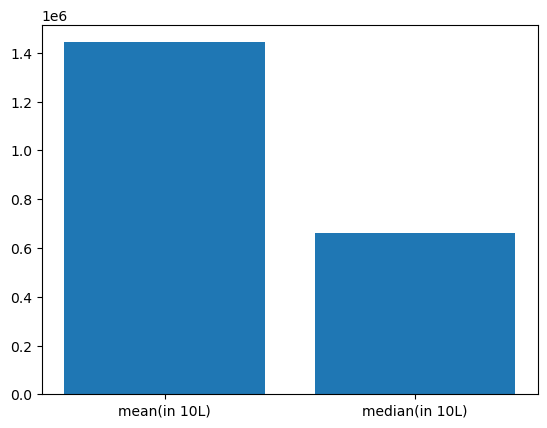

mean: 1443629.3786200194 -- median 660000.0


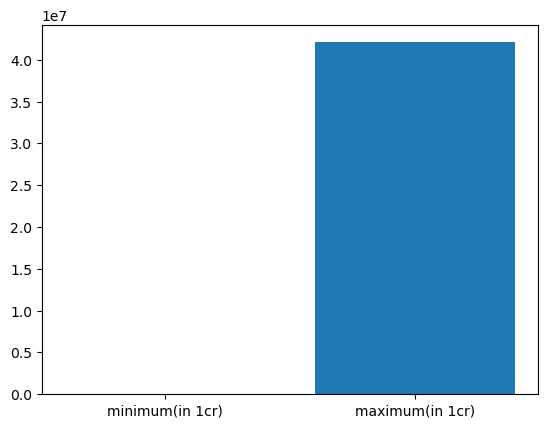

minimum: 25000.0 -- maximum 42100000.0
<class 'numpy.ndarray'>


In [48]:
plt.bar(['mean(in 10L)', 'median(in 10L)'], [np.mean(DATACAR[:, -1]), np.median(DATACAR[:, -1])])
plt.show()
print('mean:', np.mean(DATACAR[:, -1]), '-- median', np.median(DATACAR[:, -1]))
plt.bar(['minimum(in 1cr)', 'maximum(in 1cr)'], [np.min(DATACAR[:, -1]), np.max(DATACAR[:, -1])])
plt.show()
print('minimum:', np.min(DATACAR[:, -1]), '-- maximum', np.max(DATACAR[:, -1]))
print(type(DATACAR))

so now we finally have trainable data.  
and as we can see from the above graph that there is a huge difference between mean and median price  
also the range of price is huge like 25k to 4.2cr. so one model learning this data would have very high error.  
## Now comes the step that differentiate it from my old project
[Old project](https://github.com/shashi0x/Used-Car-Price-Predictor)  
so now what we will do is we will seperate these examples in 4 categories - cheap, budget, mid-range and luxury.  
this decision comes from the learning that i got from last project where our NN model only gave 85% accuracy, which i think was because while the avg price of car in that training set was 19L, the median was 8L and range was from 25k to 4.2cr.  
so now i will instead be making 4 predictors instead of one in order to be more accurate in price prediction.  

but for that we would also need a 5th model which will first classify the example in any one of these 4 categories.  
and for that 5th model we need to label each of these existing examples 0,1,2,3 (for cheap, budget, mid and luxury respectively).  
so let's label these, but first let's decide the criteria for this classification.  

<class 'numpy.ndarray'>
(5145, 9)


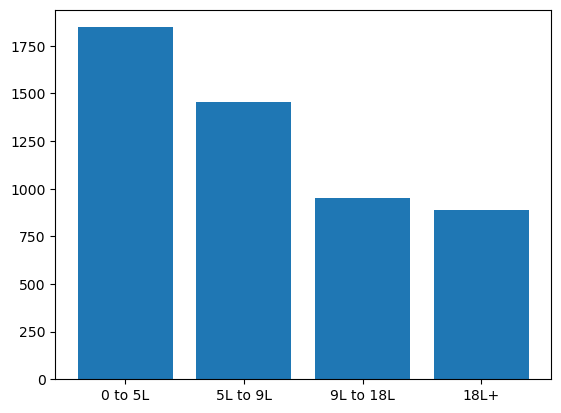

In [69]:
print(type(DATACAR))
print(np.shape(DATACAR))
one, two, three, four = 0, 0, 0, 0 #for 0 to 5L, 5L to 10L, 10L to 20L, 20L to 50L, 50l+ respectively
for i in range(len(DATACAR)):
    if DATACAR[i, -1] <= 500000:
        one += 1
    elif DATACAR[i, -1] <= 900000 and DATACAR[i, -1] > 500000:
        two += 1
    elif DATACAR[i, -1] <= 1800000 and DATACAR[i, -1] > 900000:
        three += 1
    else:
        four += 1
plt.bar(['0 to 5L', '5L to 9L', '9L to 18L', '18L+'], [one, two, three, four])
plt.show()

from the above observations  
we should have the following criteria:  
1. **Cheap**: prices from **25,000 to 5,00,000**
1. **Budget**: prices from **5,00,000 to 9,00,000**
1. **Mid-Range**: prices from **9,00,001 to 18,00,000**
1. **Luxury**: prices from **18,00,001+**

In [ ]:
CHEAP = np.zeros((one, 9))
BUDGET = np.zeros((two, 9))
MIDR = np.zeros((three, 9))
LUXURY = np.zeros((four, 9))
ones, twos, threes, fours = 0, 0, 0, 0
for i in range(len(DATACAR)):
    if DATACAR[i, -1] <= 500000:
        #cheap
        CHEAP[ones] = DATACAR[i]
        ones += 1
    elif DATACAR[i, -1] <= 900000 and DATACAR[i, -1] > 500000:
        #budget
        CHEAP[twos] = DATACAR[i]
        twos += 1
    elif DATACAR[i, -1] <= 1800000 and DATACAR[i, -1] > 900000:
        #mid
        CHEAP[threes] = DATACAR[i]
        threes += 1
    else:
        #luxury
        CHEAP[fours] = DATACAR[i]
        fours += 1

